<a href="https://colab.research.google.com/github/saptarshi-2910/LS-ML/blob/main/WEEK%201/LINEAR%20REGRESSION/linear_regression_week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Aim is to predict the marks of students of the test data

x_train after encoding and adding new feature:
 [[0 1 2 2 5 6 18 118 0.15254235995403728]
 [1 1 2 2 2 7 19 107 0.17757007686260964]
 [1 1 3 3 3 5 18 108 0.16666665123456934]
 [0 0 3 3 4 9 17 100 0.1699999830000017]
 [1 1 1 4 3 4 19 96 0.19791664605034937]]


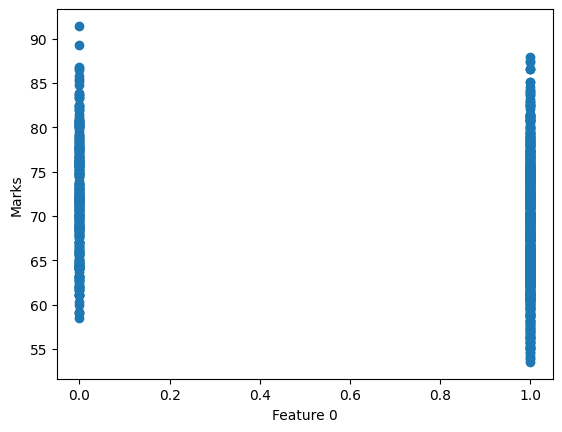

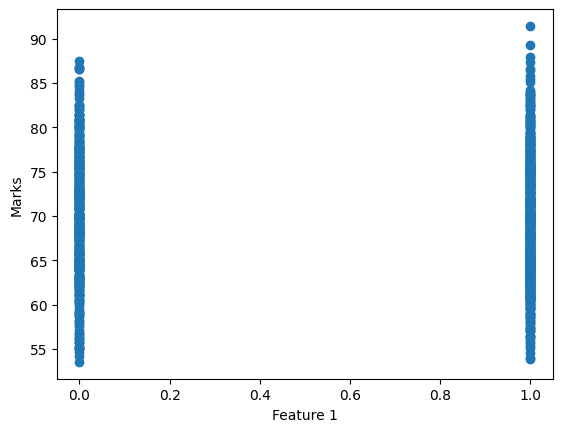

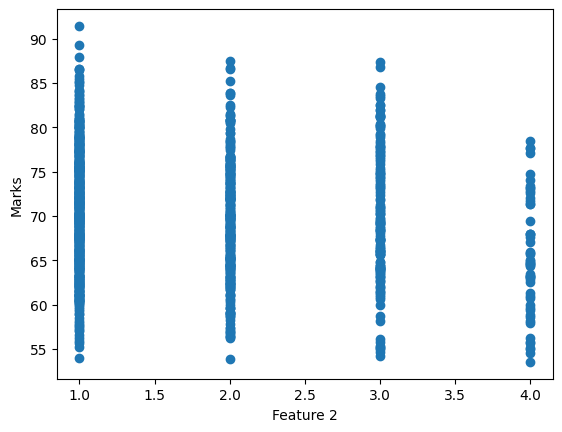

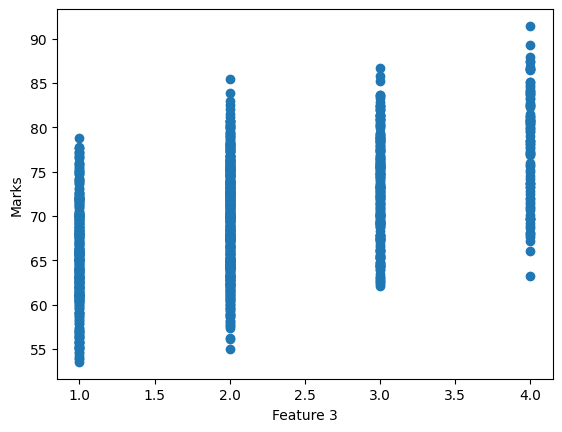

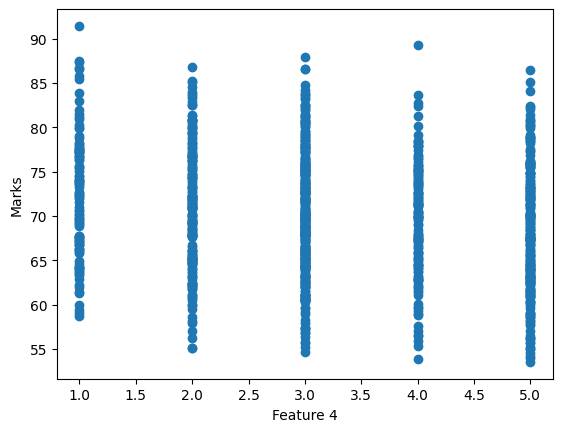

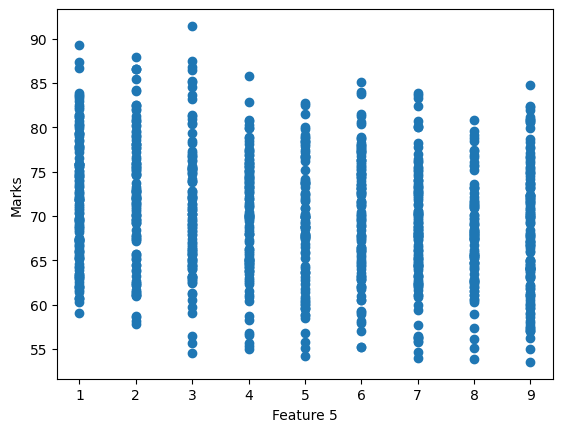

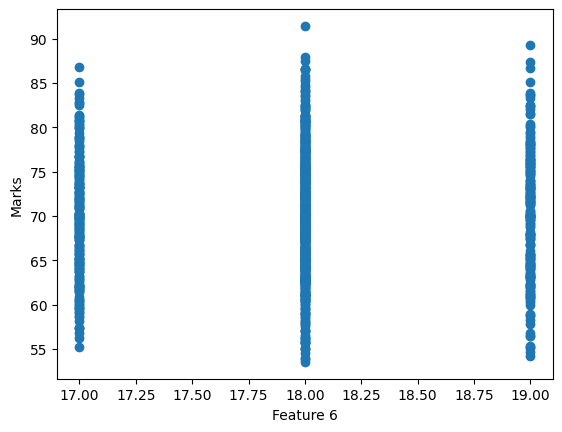

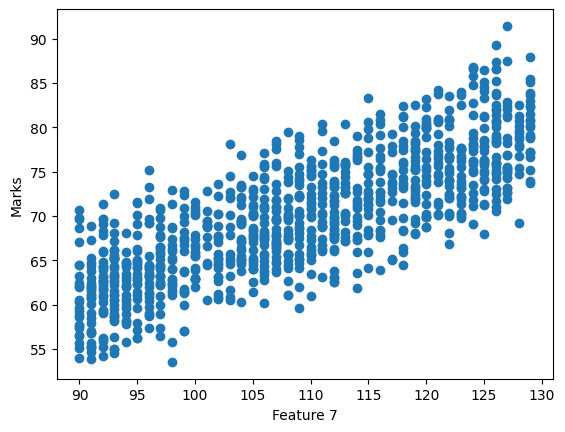

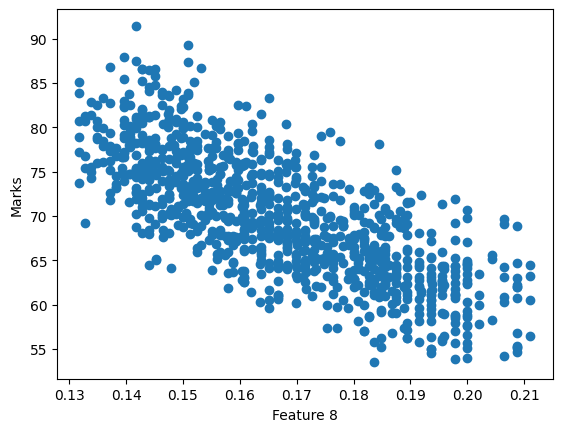

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the training data
data = pd.read_excel('Training data.xlsx')
x_train = np.array(data.iloc[:, 0:8])
y_train = np.array(data.iloc[:, 8]).reshape(-1, 1)

# Function to plot features against the target variable
def plot_features(x_train, y_train):
    for i in range(x_train.shape[1]):
        plt.figure()
        plt.scatter(x_train[:, i], y_train)
        plt.xlabel(f'Feature {i}')
        plt.ylabel('Marks')
        plt.show()

# Function to convert categorical features to numerical after that adding age/iq ratio
def feature_changing(x_train):
    label_encoder = LabelEncoder()
    for i in range(x_train.shape[1]):
        if isinstance(x_train[0, i], str):
            x_train[:, i] = label_encoder.fit_transform(x_train[:, i])

    # Add new feature: age_iq_ratio (age / iq)
    age_index = 6  #column 7
    iq_index = 7   #column 8
    age_iq_ratio = x_train[:, age_index] / (x_train[:, iq_index] + 1e-5)  #adding something so that there wont be any 0 in the denominator
    age_iq_ratio = age_iq_ratio.reshape(-1, 1)

    # Add age_iq_ratio to x_train
    x_train = np.hstack((x_train, age_iq_ratio))

    return x_train

x_train = feature_changing(x_train)

# Debug
print("x_train after encoding and adding new feature:\n", x_train[:5])

# Plot features against the target variable
plot_features(x_train, y_train)


In [4]:
# Z-score standardization
def z_score(x_train):
    x_mean = np.mean(x_train, axis=0)
    x_std = np.std(x_train, axis=0)
    x_train = (x_train - x_mean) / x_std
    return x_train, x_std, x_mean


In [5]:
# Cost function (mean squared error)
def cost(x_train, y_train, w, b):
    m = len(y_train)
    predictions = np.dot(x_train, w) + b
    loss = (1 / (2 * m)) * np.sum((predictions - y_train) ** 2)
    return loss

In [6]:
# Gradient descent
def gradient_descent(x_train, y_train, w, b, learning_rate=0.01):
    m = len(y_train)
    predictions = np.dot(x_train, w) + b
    dw = (1 / m) * np.dot(x_train.T, (predictions - y_train))
    db = (1 / m) * np.sum(predictions - y_train)
    w -= learning_rate * dw
    b -= learning_rate * db
    return w, b

In [7]:
x_train = x_train.astype(np.float64)
x_train,x_std,x_mean = z_score(x_train)

# Debug
print("Mean of standardized features:", x_mean)
print("Std deviation of standardized features:", x_std)

np.random.seed(2147483647)
w = np.random.randn(x_train.shape[1],1)
b = np.random.randn(1)

old_cost = 0

while abs(old_cost - cost(x_train,y_train,w,b))>0.00001:
  old_cost = cost(x_train,y_train,w,b)
  w,b = gradient_descent(x_train,y_train,w,b)

# Debug
print("Final weights:\n", w)
print("Final bias:\n", b)

# Load test data
x_predict = pd.read_excel('Test data.xlsx').iloc[:, :8].to_numpy()
x_predict = feature_changing(x_predict)
x_predict = (x_predict - x_mean) / x_std
ans = pd.read_excel('Test data.xlsx').iloc[:, 8].to_numpy()
y_predict = np.dot(x_predict,w) + b

# Debug
print("First few predictions:\n", y_predict[:5])
print("First few actual values:\n", ans[:5])


accuracy = 0
for dim in range(len(ans)):
  if abs(y_predict[dim]-ans[dim])<0.5: # do not change the tolerance as you'll be checked on +- 0.5 error only
    accuracy += 1
accuracy = round(accuracy*100/200.0,2)
ok = 'Congratulations' if accuracy>95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")

Mean of standardized features: [  0.682        0.577        1.742        2.102        3.191
   4.999       17.979      109.026        0.16682583]
Std deviation of standardized features: [ 0.46569947  0.49403542  0.89968661  0.92281959  1.26827402  2.66289298
  0.63289731 11.63337114  0.01901299]
Final weights:
 [[-1.38283519]
 [-0.00483757]
 [-0.89605665]
 [ 3.45767706]
 [-1.2716889 ]
 [-1.48168868]
 [ 0.89381431]
 [ 3.11199861]
 [-2.36553854]]
Final bias:
 [69.92997817]
First few predictions:
 [[74.7547348547109]
 [65.12711318770155]
 [79.35237008773602]
 [62.88030648681887]
 [68.05654205709446]]
First few actual values:
 [74.59 65.28 79.24 62.66 67.83]
Congratulations, your accuracy is 96.0%
